<a href="https://colab.research.google.com/github/azrrael22/Titanic/blob/main/Copia_de_titanic_completo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Caso de estudio: El Titanic**

# **Comprensión del negocio**

El dataset del Titanic contiene información de 891 pasajeros del famoso naufragio, con el objetivo de predecir la probabilidad de supervivencia (Survived, donde 0 = no sobrevivió y 1 = sobrevivió) a partir de características personales y del viaje. Incluye 5 variables categóricas (Pclass, Name, Sex, Ticket, Embarked, además de Cabin si se considera categórica) y 6 variables numéricas (Age, SibSp, Parch, Fare, más Survived como variable objetivo). La etiqueta de clase es Survived.

Objetivo: predecir si una persona sobrevive (variable objetivo Survived)


https://rpubs.com/lapeyus/Titanic




In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
# se importa numpy
import numpy  as np
pd.__version__
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
# si hay una versión antigua se actualiza.
#No usar siguiente instrucción
#!python -m pip install pandas==1.3.5
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

##  **Importación de librerías**

# **Comprensión de los datos**

Objetivo: conocer estructura, calidad, distribuciones y relaciones.

## **Carga del dataset**

In [ ]:
# se contruye un dataset a partir de titanic
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
df
#survived 	pclass 	sex 	age 	sibsp 	parch 	fare 	embarked 	class 	who 	adult_male 	deck 	embark_town alive  alone

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C


## **Obtener la cantidad de filas y columnas del dataframe - shape**

Se require comprenden las características del dataset. Se evidencia que el dataset original tiene 891 ejemplos y 12 columnas

In [ ]:
df.shape

(891, 12)

## **Obtener la cabecera del dataframe - head**

La cabercera del archivo permite visualizar las variables y las estructura general del dataset

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


## **Obtener los ultimos ejemplos del dataset - tail**

También es posible visualizar los últimos ejemplos del dataset

In [ ]:
print("Se imprime tail \n")
print(df.tail())

Se imprime tail 

     PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q  


## **Cambiar la precisión de numeros con decimales - display.precision**

In [ ]:
pd.set_option("display.precision", 2)

## **Cambiar nombre a las columnas**

Es posible que se quiera personalizar el nombre de las columnas

In [ ]:
# Personalizar los nombres de las columnas
#survived 	pclass 	sex 	age 	sibsp 	parch 	fare 	embarked 	class 	who 	adult_male 	deck 	embark_town alive  alone
#"sobrevivió pclass sexo edad sibsp parch tarifa embarcado clase quién adulto_masculino cubierta embarcar_ciudad vivo solo
#df.columns = ['nombre', 'sobreviviente', 'sexo', 'edad', 'clase']
df.columns = [
'pasajeroId',
'sobreviviente'         ,
'clase' ,
'nombre'            ,
'sexo',
'edad'            ,
'sibSp' ,
'parch' ,
'boleto'         ,
'tarifa' ,
'cabina'           ,
'embarcado']




## **Particionar el dataset**

Se particional el dataset, quedando 712 ejemplos para entrenamiento y el restante para test. El dataset original es de 891 filas

In [ ]:
X = df.drop('sobreviviente', axis=1)
y = df['sobreviviente']
# 80 para el entrenamiento, 20 para testeo (tradicional 70, 30 , pero hay muy pocos ejemplos)
# random_state generador de numero aleatorios (semilla usada por el generador)
# Si se  ejecuta sin especificar random_state, se obtendrá un resultado diferente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_completo_training= X_train
X_completo_training['sobreviviente']= y_train
X_completo_test= X_test
X_completo_test['sobreviviente']= y_test


In [ ]:
X_completo_training

,pasajeroId,clase,nombre,sexo,edad,sibSp,parch,boleto,tarifa,cabina,embarcado,sobreviviente
301,302,3,"McCoy, Mr. Bernard",male,NaN,2,0,367226,23.25,NaN,Q,1
309,310,1,"Francatelli, Miss. Laura Mabel",female,30.0,0,0,PC 17485,56.93,E36,C,1
516,517,2,"Lemore, Mrs. (Amelia Milley)",female,34.0,0,0,C.A. 34260,10.50,F33,S,1
120,121,2,"Hickman, Mr. Stanley George",male,21.0,2,0,S.O.C. 14879,73.50,NaN,S,0
570,571,2,"Harris, Mr. George",male,62.0,0,0,S.W./PP 752,10.50,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
715,716,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.65,F G73,S,0
767,768,3,"Mangan, Miss. Mary",female,30.5,0,0,364850,7.75,NaN,Q,0
72,73,2,"Hood, Mr. Ambrose Jr",male,21.0,0,0,S.O.C. 14879,73.50,NaN,S,0
235,236,3,"Harknett, Miss. Alice Phoebe",female,NaN,0,0,W./C. 6609,7.55,NaN,S,0


### **Si el dataset ya viene particionado, obtener variables predictoras y  de la clase con drop**

In [ ]:
# si el dataset ya viene particionado
#X_train=   df_train.drop('Survived', axis=1)
#y_train=   df_train.Survived
#print (df_test)
#X_test=   df_test.drop('Survived', axis=1)
#y_test=   df_test.Survived

## **Diccionario de datos**



Se construye una versión preliminar del diccionario de datos para el dataset de entrenamiento, de acuerdo a lo evidenciado hasta ahora o a la descripción aportada

Esta version debe refinarse. Agregue una columna llamada Tipo de variable (categórica ordinal, categórica nominal, numerica entero, numérica real). Además indique cuál es la variable de la clase. Para el caso de las variables numérica además indique valores mínimo, máximo, Valores faltantes (S/N). Además agregar metadatos por ejemplo cantidad de frecuencia por categoría


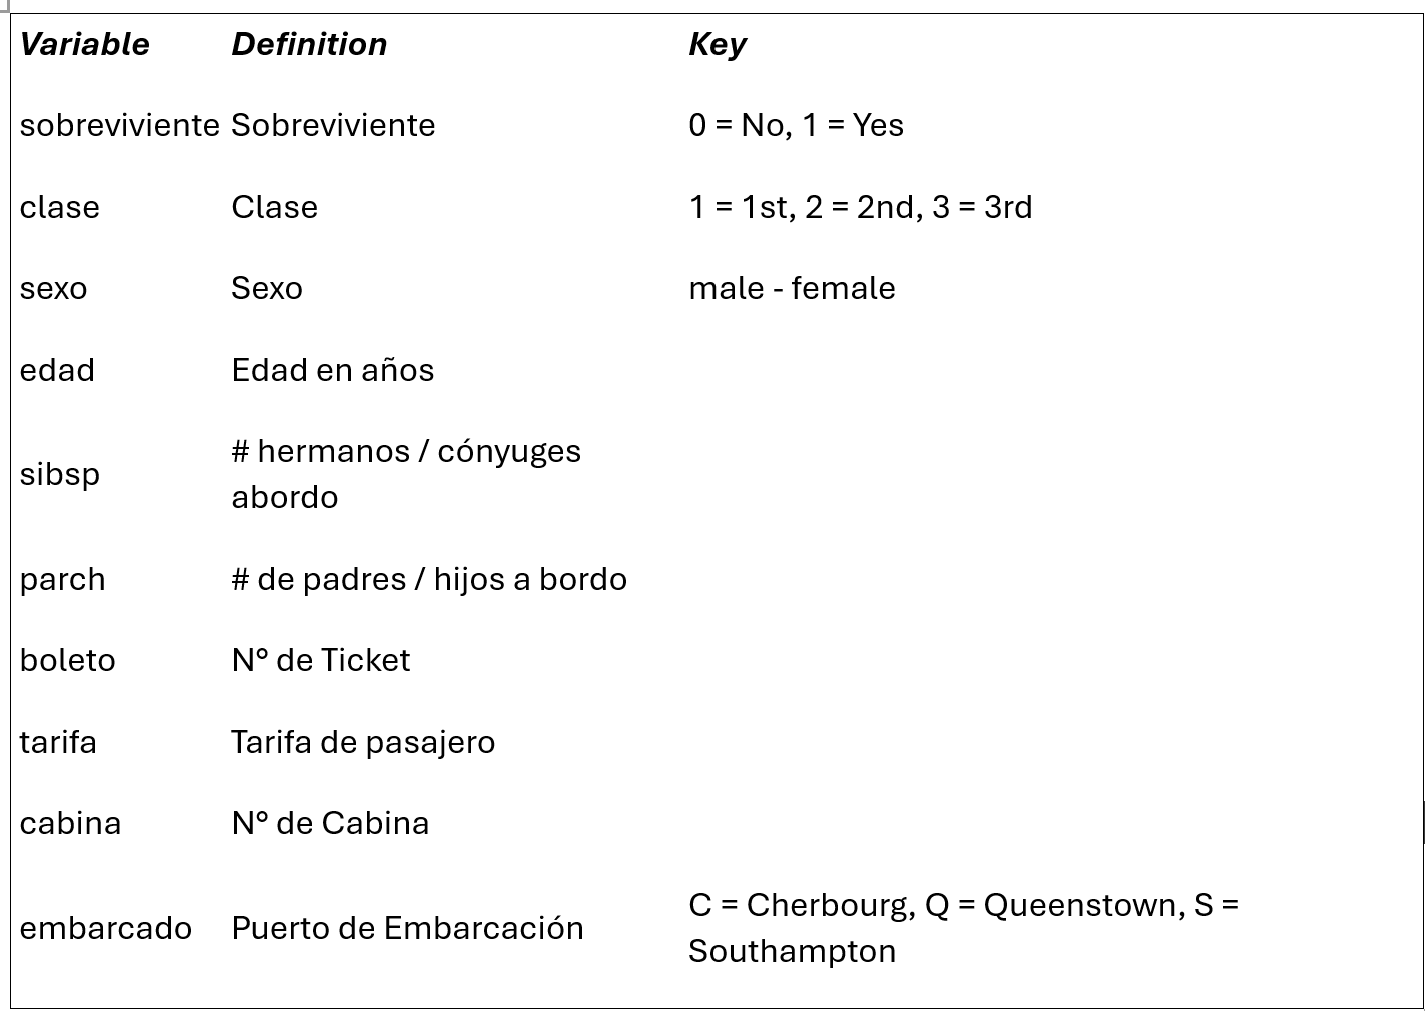

Tabla 1. Diccionario de datso. Tomada de https://www.kaggle.com/code/cinthyavergara/modelo-para-titanic-mini-tutorial-en-espa-ol#Diccionario-de-Datos

## **Obtener tipos de datos - dtypes**

In [ ]:
# tipos de datos en el dataframe
print("Se imprimen tipos de datos\n")
print (X_completo_training.dtypes)
# saber los tipos de datos
print (X_completo_training['edad'].dtypes)

Se imprimen tipos de datos

pasajeroId         int64
clase              int64
nombre            object
sexo              object
edad             float64
sibSp              int64
parch              int64
boleto            object
tarifa           float64
cabina            object
embarcado         object
sobreviviente      int64
dtype: object
float64


## **Estadistica descriptiva - para el dataset de entrenamiento**

### **describe**

In [ ]:
X_completo_training.describe().round(1)

,pasajeroId,clase,edad,sibSp,parch,tarifa,sobreviviente
count,712.0,712.0,568.0,712.0,712.0,712.0,712.0
mean,442.1,2.3,30.2,0.5,0.4,32.0,0.4
std,252.9,0.8,14.9,1.0,0.8,46.3,0.5
min,1.0,1.0,0.4,0.0,0.0,0.0,0.0
25%,225.8,2.0,20.0,0.0,0.0,7.9,0.0
50%,442.5,3.0,29.0,0.0,0.0,14.5,0.0
75%,657.2,3.0,39.0,1.0,0.0,30.7,1.0
max,891.0,3.0,80.0,8.0,6.0,512.3,1.0


In [ ]:
# ver todos los datos incluidos los categoricos
X_completo_training.describe(include = 'all')

,pasajeroId,clase,nombre,sexo,edad,sibSp,parch,boleto,tarifa,cabina,embarcado,sobreviviente
count,712.00,712.00,712,712,568.00,712.00,712.00,712,712.00,165,710,712.00
unique,NaN,NaN,712,2,NaN,NaN,NaN,569,NaN,124,3,NaN
top,NaN,NaN,"Cann, Mr. Ernest Charles",male,NaN,NaN,NaN,347088,NaN,C23 C25 C27,S,NaN
freq,NaN,NaN,1,463,NaN,NaN,NaN,5,NaN,4,513,NaN
mean,442.12,2.30,NaN,NaN,30.17,0.49,0.37,NaN,31.95,NaN,NaN,0.38
std,252.91,0.84,NaN,NaN,14.86,1.01,0.78,NaN,46.31,NaN,NaN,0.49
min,1.00,1.00,NaN,NaN,0.42,0.00,0.00,NaN,0.00,NaN,NaN,0.00
25%,225.75,2.00,NaN,NaN,20.00,0.00,0.00,NaN,7.90,NaN,NaN,0.00
50%,442.50,3.00,NaN,NaN,29.00,0.00,0.00,NaN,14.46,NaN,NaN,0.00
75%,657.25,3.00,NaN,NaN,39.00,1.00,0.00,NaN,30.70,NaN,NaN,1.00


In [ ]:
X_completo_training['edad'].describe()

,edad
count,568.00
mean,30.17
std,14.86
min,0.42
25%,20.00
50%,29.00
75%,39.00
max,80.00


### **Cantidad de ejemplos del dataset de entrenamiento**

El dataset de entrenamiento queda entonces con 712 ejemplos

In [ ]:
X_completo_training.shape

(712, 12)

### **Analisis de Variables categoricas**

In [ ]:
# Se revisa la cantidad de categorias existentes
var_cat = [ "sobreviviente", "clase", 'sexo', 'cabina', 'embarcado']
X_completo_training [var_cat].astype('category')
X_completo_training [var_cat].nunique()


,0
sobreviviente,2
clase,3
sexo,2
cabina,124
embarcado,3


### **Listar los posibles valores por categoría**

In [ ]:
for i in var_cat:
    print(i)
    print ("categorias para "+i+ "     "+ str (X_completo_training[i].unique()))




sobreviviente
categorias para sobreviviente     [1 0]
clase
categorias para clase     [3 1 2]
sexo
categorias para sexo     ['male' 'female']
cabina
categorias para cabina     [nan 'E36' 'F33' 'B5' 'B57 B59 B63 B66' 'B4' 'A32' 'T' 'B28' 'C101' 'D35'
 'D11' 'D15' 'C65' 'D45' 'C104' 'C92' 'B49' 'D30' 'C93' 'F2' 'C70' 'C78'
 'C46' 'B96 B98' 'C125' 'E31' 'E67' 'B86' 'B58 B60' 'D20' 'C23 C25 C27'
 'C118' 'C103' 'B20' 'E10' 'C22 C26' 'B78' 'C68' 'C95' 'B50' 'C83' 'B30'
 'D37' 'A19' 'C54' 'F G63' 'B22' 'C62 C64' 'D6' 'D26' 'E24' 'F4' 'D28'
 'B51 B53 B55' 'D21' 'C47' 'B41' 'E44' 'E8' 'G6' 'B18' 'A26' 'C126' 'C86'
 'A34' 'C82' 'D33' 'D10 D12' 'F E69' 'C49' 'C110' 'B35' 'C45' 'B3' 'E17'
 'D' 'E40' 'C124' 'C128' 'B77' 'C85' 'B39' 'E12' 'A16' 'F38' 'A7' 'E101'
 'D7' 'A36' 'C148' 'A14' 'A24' 'B73' 'D47' 'C52' 'E63' 'D56' 'C32' 'C123'
 'B38' 'E49' 'E121' 'A23' 'B19' 'C30' 'E25' 'C99' 'A5' 'C50' 'C91' 'F G73'
 'B94' 'C2' 'E33' 'D19' 'B69' 'D46' 'E38' 'D9' 'A31' 'E34' 'D36' 'C87'
 'A10']
embarcado
cat

### **Se reduce dimensionalidad dejando solo letra inicial de cabina -Hace parte de la limpieza**

Se observan que hay muchos valores de cabina, por lo que se dejara solo la letra inicial

In [ ]:
X_completo_training.cabina.fillna("XX", inplace = True)
#se analiza solo la primera letra de la cabina
X_completo_training['Cabin_letter'] =df.cabina.str.slice(0, 1)
X_completo_test['Cabin_letter'] =df.cabina.str.slice(0, 1)


/tmp/ipython-input-3985381334.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
X_completo_training

,pasajeroId,clase,nombre,sexo,edad,sibSp,parch,boleto,tarifa,cabina,embarcado,sobreviviente,Cabin_letter
301,302,3,"McCoy, Mr. Bernard",male,NaN,2,0,367226,23.25,XX,Q,1,NaN
309,310,1,"Francatelli, Miss. Laura Mabel",female,30.0,0,0,PC 17485,56.93,E36,C,1,E
516,517,2,"Lemore, Mrs. (Amelia Milley)",female,34.0,0,0,C.A. 34260,10.50,F33,S,1,F
120,121,2,"Hickman, Mr. Stanley George",male,21.0,2,0,S.O.C. 14879,73.50,XX,S,0,NaN
570,571,2,"Harris, Mr. George",male,62.0,0,0,S.W./PP 752,10.50,XX,S,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,716,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.65,F G73,S,0,F
767,768,3,"Mangan, Miss. Mary",female,30.5,0,0,364850,7.75,XX,Q,0,NaN
72,73,2,"Hood, Mr. Ambrose Jr",male,21.0,0,0,S.O.C. 14879,73.50,XX,S,0,NaN
235,236,3,"Harknett, Miss. Alice Phoebe",female,NaN,0,0,W./C. 6609,7.55,XX,S,0,NaN


In [ ]:
X_completo_training

,pasajeroId,clase,nombre,sexo,edad,sibSp,parch,boleto,tarifa,cabina,embarcado,sobreviviente,Cabin_letter
301,302,3,"McCoy, Mr. Bernard",male,NaN,2,0,367226,23.25,XX,Q,1,NaN
309,310,1,"Francatelli, Miss. Laura Mabel",female,30.0,0,0,PC 17485,56.93,E36,C,1,E
516,517,2,"Lemore, Mrs. (Amelia Milley)",female,34.0,0,0,C.A. 34260,10.50,F33,S,1,F
120,121,2,"Hickman, Mr. Stanley George",male,21.0,2,0,S.O.C. 14879,73.50,XX,S,0,NaN
570,571,2,"Harris, Mr. George",male,62.0,0,0,S.W./PP 752,10.50,XX,S,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,716,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.65,F G73,S,0,F
767,768,3,"Mangan, Miss. Mary",female,30.5,0,0,364850,7.75,XX,Q,0,NaN
72,73,2,"Hood, Mr. Ambrose Jr",male,21.0,0,0,S.O.C. 14879,73.50,XX,S,0,NaN
235,236,3,"Harknett, Miss. Alice Phoebe",female,NaN,0,0,W./C. 6609,7.55,XX,S,0,NaN


**Boxplot variable edad**

In [ ]:
px.box(X_completo_training,y='edad', title='Boxplot variable edad')

In [ ]:
px.box(X_completo_training,x = 'sobreviviente',y='edad', color='sobreviviente',
       title='Boxplots edad con relación a sobreviviente')

### **Boxplot variable edad en relacion a supervivencia y sexo**

In [ ]:
px.box(X_completo_training,x = 'sexo',y='edad', color='sobreviviente',
       title='Boxplots edad con relación al sexo')

In [ ]:
def ponerNumerosBarra (ax):
  for bar in ax.patches:
        height = bar.get_height()
        width = bar.get_width()
        x = bar.get_x()
        y = bar.get_y()

        label_text = height
        label_x = x + width / 2
        label_y = y + height / 2


        ax.text(label_x, label_y, '{:,.1f}'.format(label_text), ha='center',
                va='center')


### **Gráfico de barras para sexo**

,count
sobreviviente,
0,443
1,269


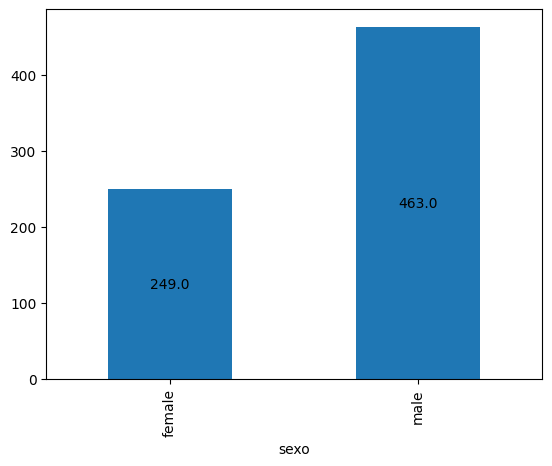

In [ ]:
ax= X_completo_training.groupby('sexo')['nombre'].nunique().plot(kind='bar')
ponerNumerosBarra(ax)
X_completo_training.value_counts('sobreviviente')

### **Grafico de barras sexo clase apilado por sobreviviente**

Se construye un grafico de barras sexo clase apilado'


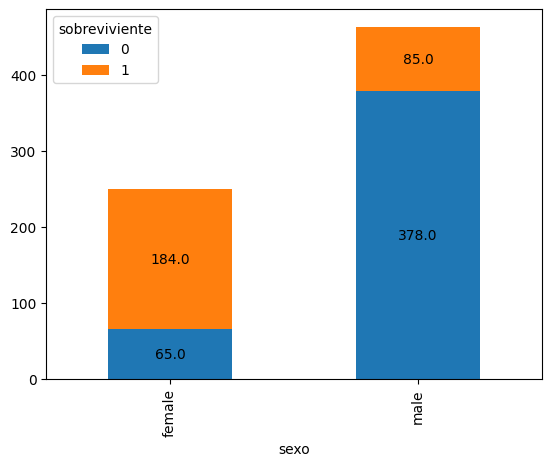

In [ ]:
print("Se construye un grafico de barras sexo clase apilado'")
ax = X_completo_training.groupby(['sexo','sobreviviente']).size().unstack().plot(kind='bar',stacked=True)
ponerNumerosBarra(ax)

### **Gráfico de barras supervivencia por sexo**

In [ ]:
px.bar(X_completo_training, x="sexo", y="sobreviviente", color='sexo')

### **strip**

### **Scatter**

In [ ]:
px.strip(X_completo_training, x="edad", y="sexo",
         color="sobreviviente", stripmode='overlay')

In [ ]:
px.scatter(X_completo_training, x="edad", y="tarifa",  facet_row="sexo", facet_col="clase", color="sobreviviente")

In [ ]:
px.scatter_matrix(X_completo_training, dimensions=['edad','tarifa','sexo'])

### **pairplot**

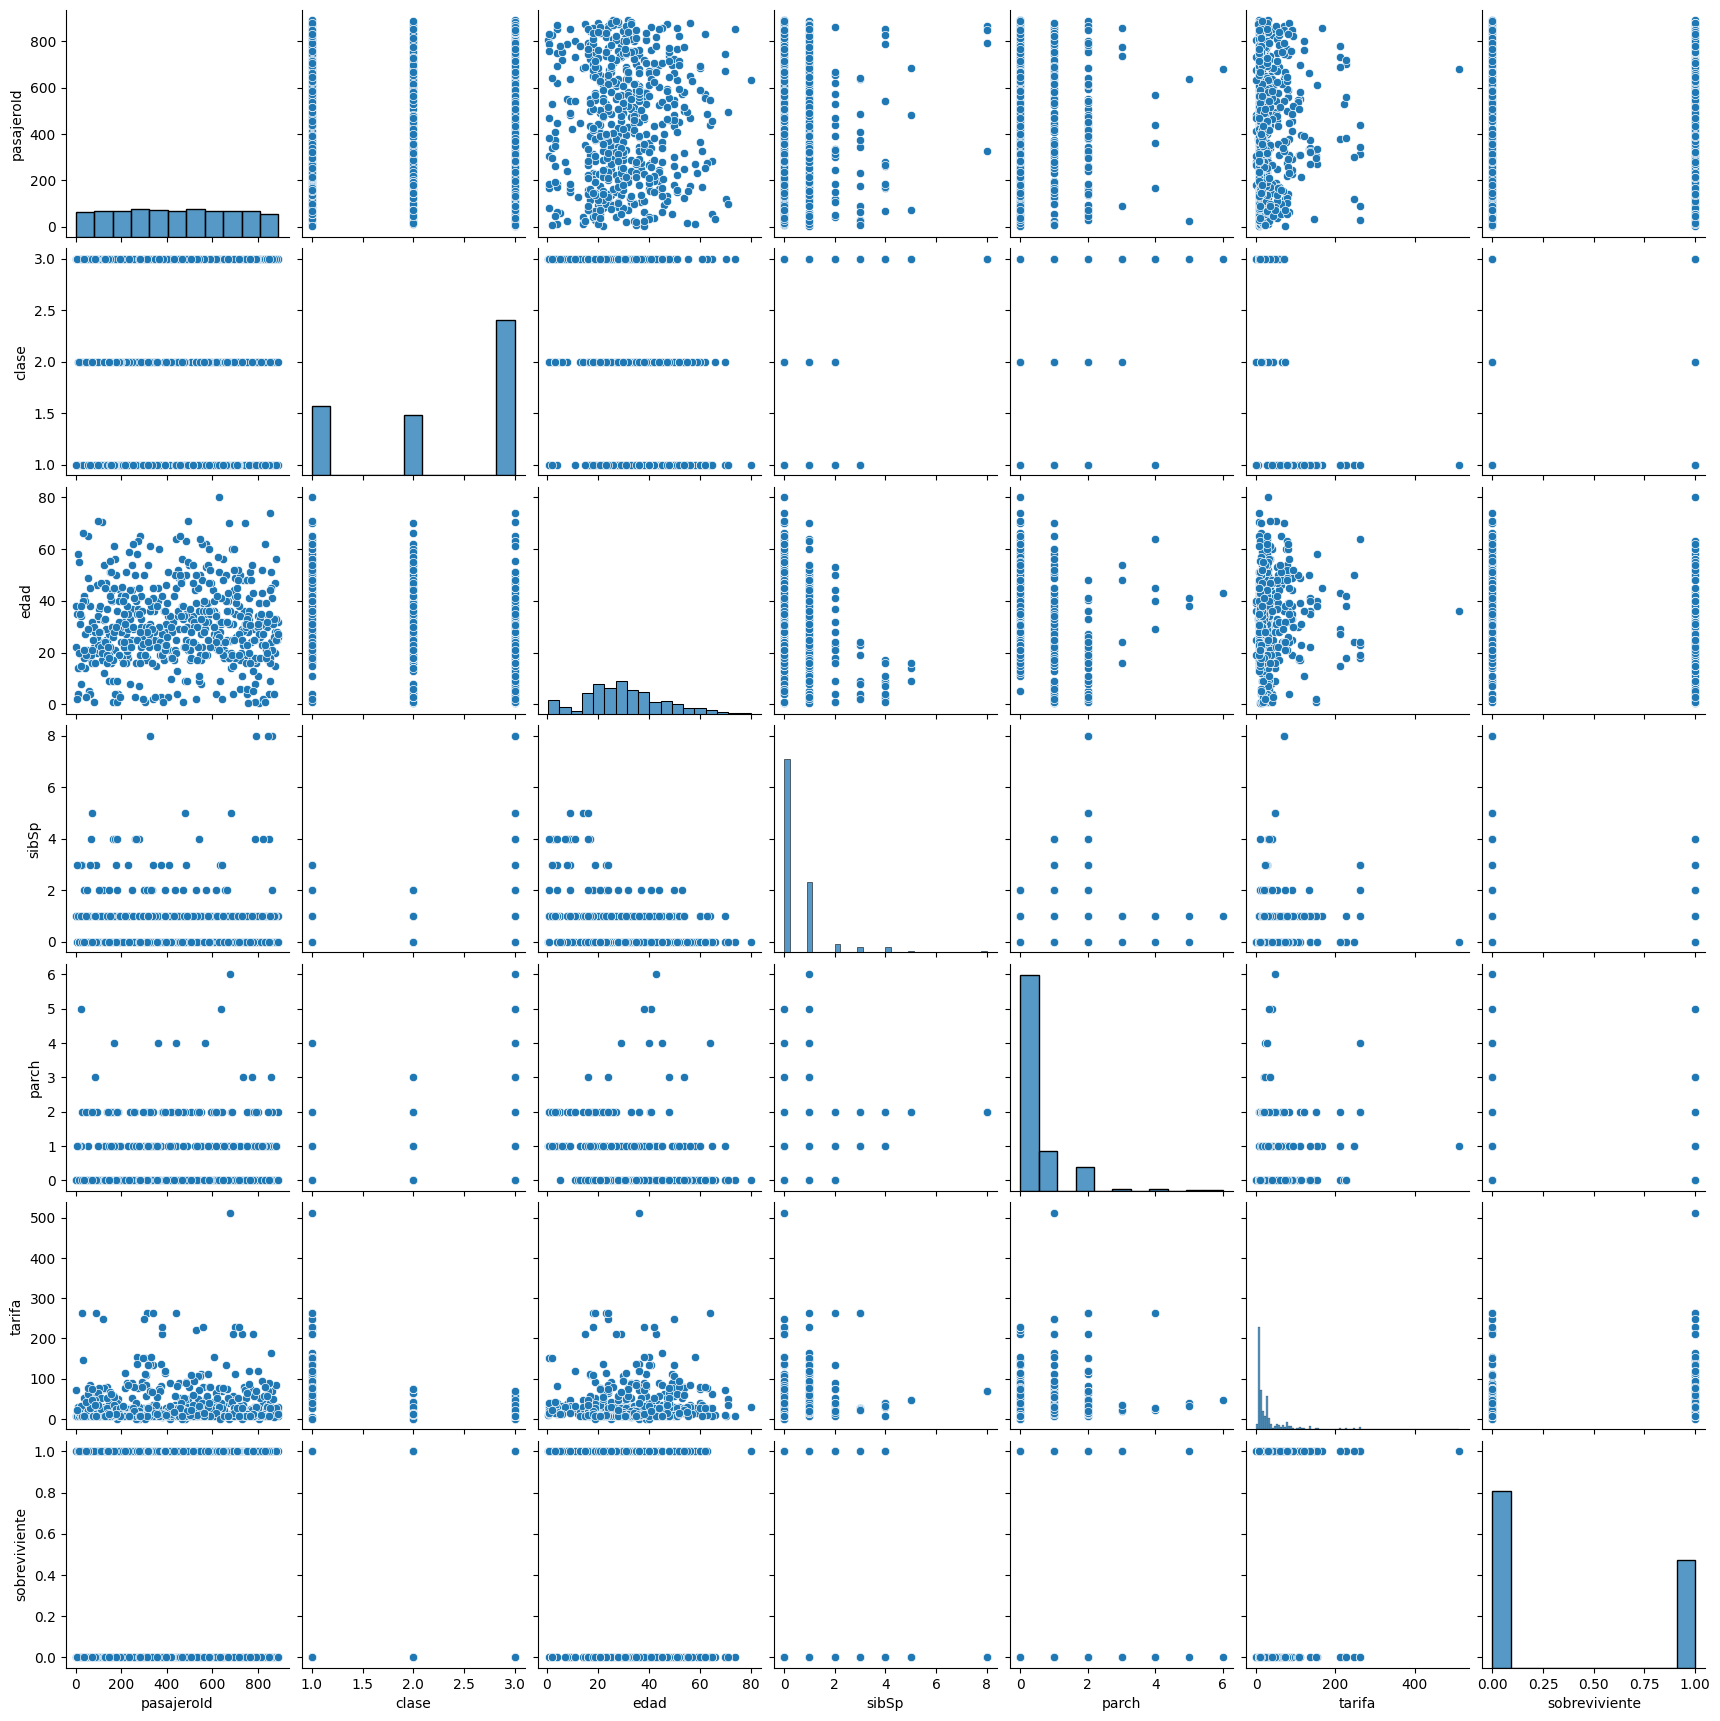

In [ ]:
sns.pairplot(X_completo_training);

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



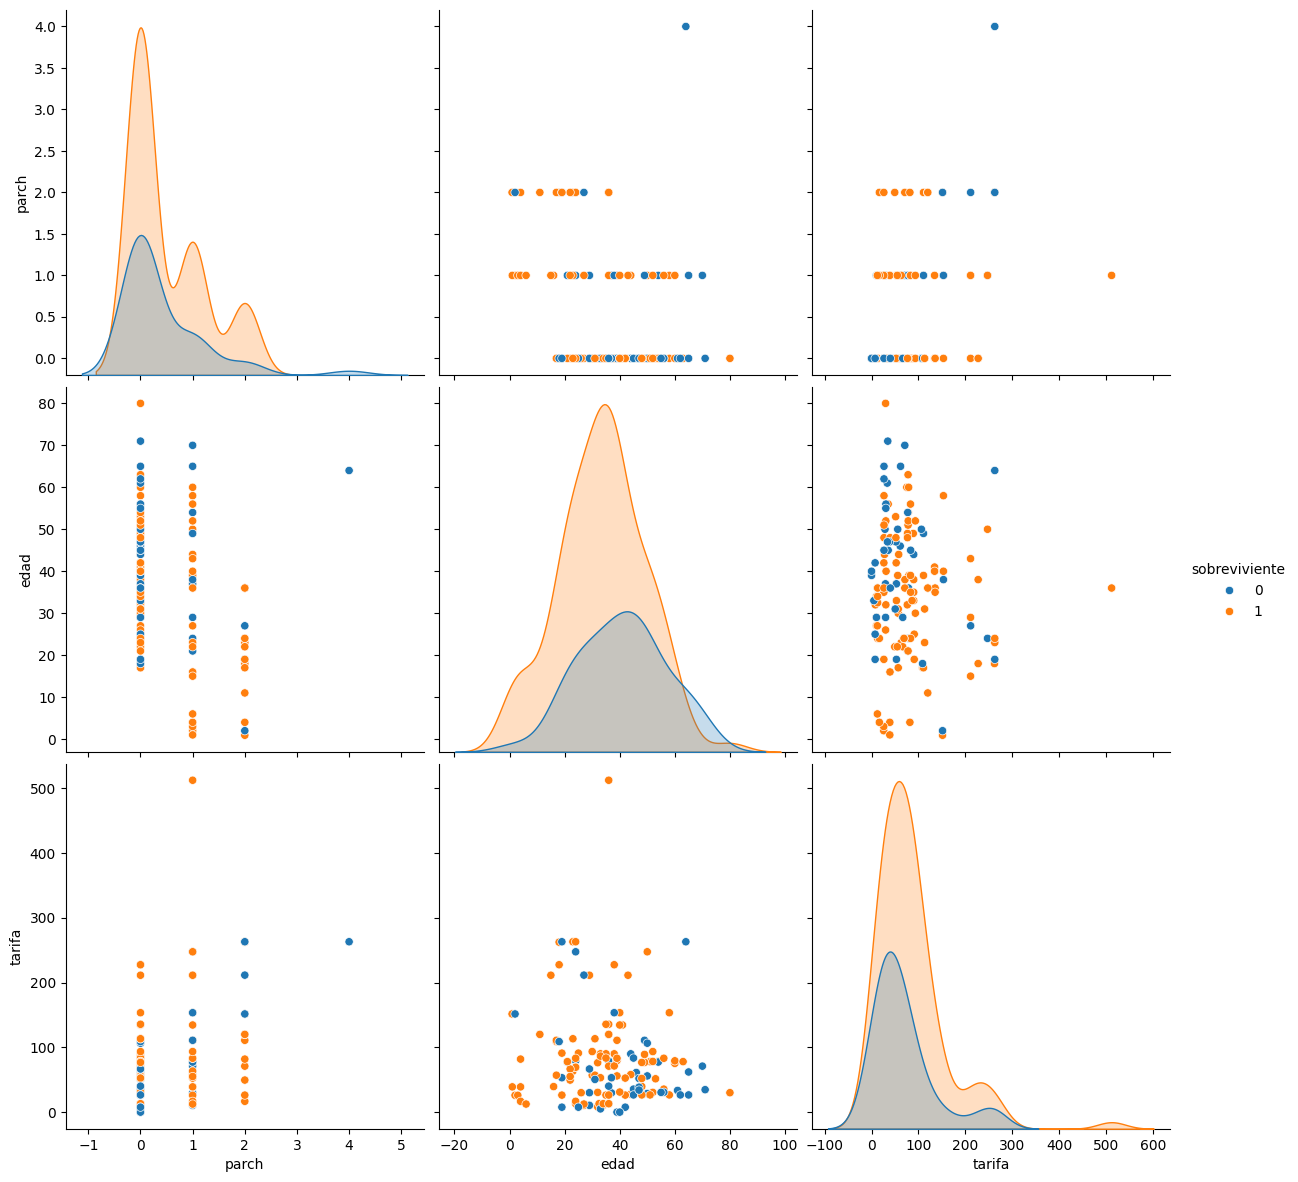

In [ ]:
sns.pairplot(X_completo_training.dropna(), hue='sobreviviente',size=4,vars=['parch', 'edad', 'tarifa'],kind='scatter')

### **stripplot**

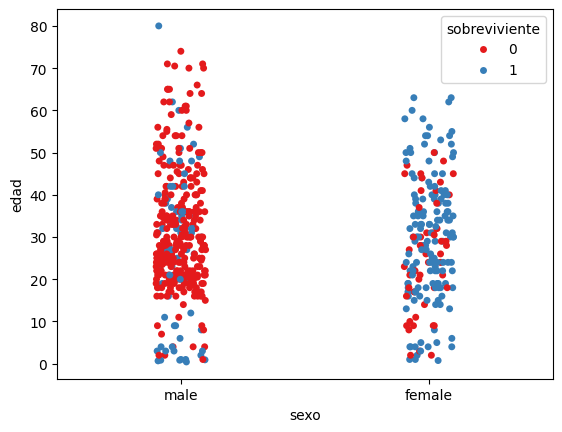

In [ ]:
sns.stripplot(x="sexo", y="edad", data=X_completo_training,jitter=True,hue='sobreviviente',palette='Set1');

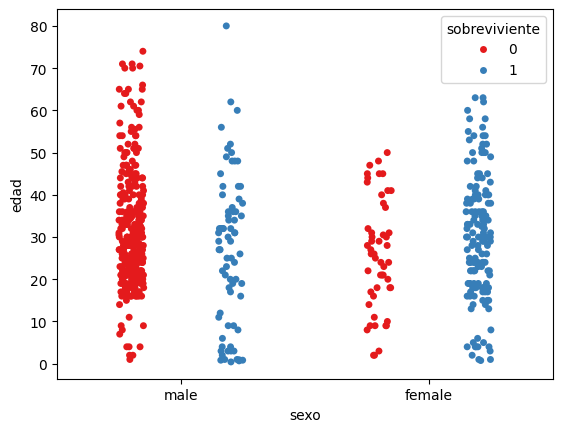

In [ ]:
sns.stripplot(x="sexo", y="edad", data=X_completo_training,jitter=True,hue='sobreviviente',palette='Set1', dodge=True);


### **Gráfico de barras no apilado unstack**

Se construye un grafico de barras sexo clase apilado'


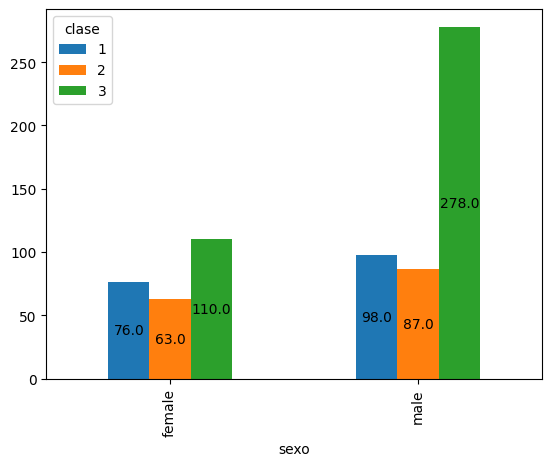

In [ ]:
print("Se construye un grafico de barras sexo clase apilado'")
ax = X_completo_training.groupby(['sexo','clase']).size().unstack().plot(kind='bar')
ponerNumerosBarra(ax)

### **Tabla de contingencia letra de la cabina vrs sobreviviente crosstab**

In [ ]:
pd.crosstab([X_completo_training.Cabin_letter],[X_completo_training.sobreviviente],
            margins=False, normalize='index').style.background_gradient(cmap='pink_r')

sobreviviente,0,1
Cabin_letter,,
A,0.615385,0.384615
B,0.228571,0.771429
C,0.411765,0.588235
D,0.230769,0.769231
E,0.166667,0.833333
F,0.333333,0.666667
G,0.333333,0.666667
T,1.000000,0.000000


### **Frecuencia por cada posible valor que toma la variable categórica**

In [ ]:
# Frecuencia por cada posible valor que toma la variable categórica
var_cat = [ "sobreviviente", "clase", 'sexo', 'Cabin_letter', 'embarcado']
for i in var_cat:
    print(i)
    #dropna remueve filas que continen valores NULL
    c = X_completo_training[i].value_counts(dropna=False)
    p = round(X_completo_training[i].value_counts(dropna=False, normalize=True),1)
    # se concatenan c y p
    print(pd.concat([c,p], axis=1, keys=['counts', '%']))

sobreviviente
               counts    %
sobreviviente             
0                 443  0.6
1                 269  0.4
clase
       counts    %
clase             
3         388  0.5
1         174  0.2
2         150  0.2
sexo
        counts    %
sexo               
male       463  0.7
female     249  0.3
Cabin_letter
              counts    %
Cabin_letter             
NaN              547  0.8
C                 51  0.1
B                 35  0.0
D                 26  0.0
E                 24  0.0
A                 13  0.0
F                 12  0.0
G                  3  0.0
T                  1  0.0
embarcado
           counts    %
embarcado             
S             513  0.7
C             133  0.2
Q              64  0.1
NaN             2  0.0


### **Tabla de contingencia para todas las  variables categóricas**

In [ ]:
# Tabla de contingencia para variables categóricas
pd.crosstab([X_completo_training.embarcado,X_completo_training.clase],[X_completo_training.sexo,X_completo_training.sobreviviente],margins=True).style.background_gradient(cmap='pink_r')

# **Limpieza y feature engineering**

## **Identifica si hay nulos isnull**

In [ ]:
X_completo_training.isnull()

,pasajeroId,clase,nombre,sexo,edad,sibSp,parch,boleto,tarifa,cabina,embarcado,sobreviviente,Cabin_letter
301,False,False,False,False,True,False,False,False,False,False,False,False,True
309,False,False,False,False,False,False,False,False,False,False,False,False,False
516,False,False,False,False,False,False,False,False,False,False,False,False,False
120,False,False,False,False,False,False,False,False,False,False,False,False,True
570,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,False,False,False,False,False,False,False,False,False,False,False,False,False
767,False,False,False,False,False,False,False,False,False,False,False,False,True
72,False,False,False,False,False,False,False,False,False,False,False,False,True
235,False,False,False,False,True,False,False,False,False,False,False,False,True


## **Borrar nulos dropna**

In [ ]:
#X_completo_training =  X_completo_training.dropna()
#X_completo_training

Se rellenan los campos vacios pertenecientes a variables numericas con la media de la misma clase. Tenga en cuenta que esto también debería hacerse para los datos atipicos

## **Limpiar columnas numericas, Rellenar vacios por media de la misma clase**

In [ ]:
def limpiar_columnas_numericas (etiqueta_label, df_procesar, var_num):
  dataset = pd.DataFrame()
  print (etiqueta_label)
  for label in  df_procesar[etiqueta_label].unique():
    # el dataset se parte en 2
    print (label)
    filtrado_por_label = df_procesar[df_procesar[etiqueta_label] == label ]
    for columna in  var_num:
      Q1 = filtrado_por_label[[columna]].quantile(0.25)
      Q3 = filtrado_por_label[[columna]].quantile(0.75)
      IQR = Q3 - Q1
      print(IQR)
      extremo_inferior=Q1-1.58*IQR
      extremo_superior= Q3+1.58*IQR
      filtro = filtrado_por_label[(filtrado_por_label[[columna]] >= (int)(extremo_inferior)) & (filtrado_por_label[[columna]] < (int)(extremo_superior) )]
      media= (filtrado_por_label[[columna]].mean())
      #se reemplazan los valores faltes por la media de la clase
      filtrado_por_label[[columna]]= filtrado_por_label[[columna]].fillna(value=media)
      #Tenga en cuenta que no se han reemplazado valores atipicos
    dataset = pd.concat([dataset, filtrado_por_label], axis=0)

  return (dataset)



In [ ]:
var_num = [ "edad", "tarifa"]
X_completo_training= limpiar_columnas_numericas ("sobreviviente", X_completo_training, var_num)

sobreviviente
1
edad    21.0
dtype: float64
tarifa    54.12
dtype: float64
0
edad    19.0
dtype: float64
tarifa    18.16
dtype: float64


/tmp/ipython-input-2474738679.py:15: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead

/tmp/ipython-input-2474738679.py:15: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead

/tmp/ipython-input-2474738679.py:15: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead

/tmp/ipython-input-2474738679.py:15: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead

/tmp/ipython-input-2474738679.py:15: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead

/tmp/ipython-input-2474738679.py:15: FutureWarning:

Calling int on a single element Series is deprecated and 

In [ ]:
X_completo_training.isnull()

,pasajeroId,clase,nombre,sexo,edad,sibSp,parch,boleto,tarifa,cabina,embarcado,sobreviviente,Cabin_letter
301,False,False,False,False,False,False,False,False,False,False,False,False,True
309,False,False,False,False,False,False,False,False,False,False,False,False,False
516,False,False,False,False,False,False,False,False,False,False,False,False,False
570,False,False,False,False,False,False,False,False,False,False,False,False,True
730,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,False,False,False,False,False,False,False,False,False,False,False,False,False
767,False,False,False,False,False,False,False,False,False,False,False,False,True
72,False,False,False,False,False,False,False,False,False,False,False,False,True
235,False,False,False,False,False,False,False,False,False,False,False,False,True


## **Limpiar columnas categoricas, rellenar vacios por moda de la misma clase**

In [ ]:
def limpiar_columnas_categoricas (etiqueta_label, df_procesar, var_num):
  dataset = pd.DataFrame()
  for label in  df_procesar[etiqueta_label].unique():
    # el dataset se parte en 2

    filtrado_por_label = df_procesar[df_procesar[etiqueta_label] == label ]
    for columna in  var_cat:
      print ("columna")
      print (columna)
      moda = filtrado_por_label[[columna]].mode()
      print ("moda")
      print (moda)
      #se reemplazan los valores faltes por la moda de la clase
      filtrado_por_label[[columna]] = filtrado_por_label[[columna]].apply(
        lambda x: x.fillna(x.mode().iloc[0]) if not x.isna().all() else x
        )
      #filtrado_por_label[[columna]]= filtrado_por_label[[columna]].fillna(value=moda)
      #Tenga en cuenta que no se han reemplazado valores atipicos
    dataset = pd.concat([dataset, filtrado_por_label], axis=0)
  return (dataset)


In [ ]:
var_cat = [ "clase", 'sexo', 'Cabin_letter', 'embarcado']
X_completo_training= limpiar_columnas_categoricas ("sobreviviente", X_completo_training, var_cat)

columna
clase
moda
   clase
0      1
columna
sexo
moda
     sexo
0  female
columna
Cabin_letter
moda
  Cabin_letter
0            C
columna
embarcado
moda
  embarcado
0         S
columna
clase
moda
   clase
0      3
columna
sexo
moda
   sexo
0  male
columna
Cabin_letter
moda
  Cabin_letter
0            C
columna
embarcado
moda
  embarcado
0         S


## **Frecuencia por cada posible valor que toma la variable categórica**

In [ ]:
# Frecuencia por cada posible valor que toma la variable categórica
var_cat = [ "sobreviviente", "clase", 'sexo', 'Cabin_letter', 'embarcado']
for i in var_cat:
    print(i)
    #dropna remueve filas que continen valores NULL
    c = X_completo_training[i].value_counts(dropna=False)
    p = round(X_completo_training[i].value_counts(dropna=False, normalize=True),1)
    # se concatenan c y p
    print(pd.concat([c,p], axis=1, keys=['counts', '%']))

sobreviviente
               counts    %
sobreviviente             
0                 443  0.6
1                 269  0.4
clase
       counts    %
clase             
3         388  0.5
1         174  0.2
2         150  0.2
sexo
        counts    %
sexo               
male       463  0.7
female     249  0.3
Cabin_letter
              counts    %
Cabin_letter             
C                598  0.8
B                 35  0.0
D                 26  0.0
E                 24  0.0
A                 13  0.0
F                 12  0.0
G                  3  0.0
T                  1  0.0
embarcado
           counts    %
embarcado             
S             515  0.7
C             133  0.2
Q              64  0.1


In [ ]:
print (X_completo_training )

     pasajeroId  clase                                      nombre    sexo  \
301         302      3                          McCoy, Mr. Bernard    male   
309         310      1              Francatelli, Miss. Laura Mabel  female   
516         517      2                Lemore, Mrs. (Amelia Milley)  female   
570         571      2                          Harris, Mr. George    male   
730         731      1               Allen, Miss. Elisabeth Walton  female   
..          ...    ...                                         ...     ...   
715         716      3  Soholt, Mr. Peter Andreas Lauritz Andersen    male   
767         768      3                          Mangan, Miss. Mary  female   
72           73      2                        Hood, Mr. Ambrose Jr    male   
235         236      3                Harknett, Miss. Alice Phoebe  female   
37           38      3                    Cann, Mr. Ernest Charles    male   

      edad  sibSp  parch        boleto  tarifa cabina embarcado

Las funciones construidas son reutilizables y pueden usarse con el dataset de testeo

In [ ]:
var_num = [ "edad", "tarifa"]
X_completo_test= limpiar_columnas_numericas ("sobreviviente", X_completo_training, var_num)
var_cat = [ "clase", 'sexo', 'Cabin_letter', 'embarcado']
X_completo_test= limpiar_columnas_categoricas ("sobreviviente", X_completo_training, var_cat)

sobreviviente
1
edad    16.0
dtype: float64
tarifa    54.12
dtype: float64
0
edad    12.0
dtype: float64
tarifa    18.16
dtype: float64


/tmp/ipython-input-2474738679.py:15: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead

/tmp/ipython-input-2474738679.py:15: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead

/tmp/ipython-input-2474738679.py:15: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead

/tmp/ipython-input-2474738679.py:15: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead

/tmp/ipython-input-2474738679.py:15: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead

/tmp/ipython-input-2474738679.py:15: FutureWarning:

Calling int on a single element Series is deprecated and 

columna
clase
moda
   clase
0      1
columna
sexo
moda
     sexo
0  female
columna
Cabin_letter
moda
  Cabin_letter
0            C
columna
embarcado
moda
  embarcado
0         S
columna
clase
moda
   clase
0      3
columna
sexo
moda
   sexo
0  male
columna
Cabin_letter
moda
  Cabin_letter
0            C
columna
embarcado
moda
  embarcado
0         S


## **Matriz de correlacion de Pearson- etapa de comprensión de los datos**

Se obtiene matriz de correlacion. Se verifica que si hay correlaciones entre A y B superiores a 0.7. Si existe, entonces una de las dos variables se elimina A ó B.


In [ ]:
# Import plotly
import plotly.figure_factory as ff
# se comenta temporalmente
#df = df.drop('pasajeroId',axis=1)
# obtener los valores de la correlacion

X_completo_correlacion=pd.DataFrame()
#X_completo_correlacion=pd.concat([X_completo_correlacion, X_completo_training])
X_completo_correlacion = X_completo_training.copy()

#X_completo_correlacion['sobreviviente'] = X_completo_correlacion['sobreviviente'].astype('category').cat.codes

#X_completo_correlacion['sexo'] = X_completo_correlacion['sexo'].astype('category').cat.codes
#X_completo_correlacion['embarcado'] = X_completo_correlacion['embarcado'].astype('category').cat.codes
#X_completo_correlacion['cabina'] = X_completo_correlacion['Cabin_letter'].astype('category').cat.codes

# Encode categorical variables for correlation calculation
#X_completo_correlacion['sexo_encoded'] = X_completo_correlacion['sexo'].astype('category').cat.codes
#X_completo_correlacion['embarcado_encoded'] = X_completo_correlacion['embarcado'].astype('category').cat.codes
#X_completo_correlacion['Cabin_letter_encoded'] = X_completo_correlacion['Cabin_letter'].astype('category').cat.codes


#df.drop(columns=['nombre','boleto'],  inplace=True)
#df2= df.drop(columns=['nombre','boleto'],  inplace=True)

# Select only numeric columns for correlation, including the newly encoded ones
correlation = X_completo_correlacion[['clase', 'edad', 'sibSp', 'parch', 'tarifa', 'sobreviviente']].corr(numeric_only=True).values.round(2)

# nombres de la columnas
names = list(X_completo_correlacion[['clase', 'edad', 'sibSp', 'parch', 'tarifa', 'sobreviviente']].corr(numeric_only=True).columns.values)

# se obtiene la transpuesta
transposed_corr = correlation[::-1]
ff.create_annotated_heatmap(transposed_corr, x = names,y = names[::-1], colorscale='plotly3')

## **Eliminar columnas**

Esta funcion permite eliminar varias columnas al tiempo.

In [ ]:
def eliminar_columnas (df_procesar, var_elim):
  for columna in  var_elim:
    df_procesar.drop(columns=[columna],  inplace=True)
  return (df_procesar)

In [ ]:
val_elim =  ['pasajeroId', 'nombre', 'boleto', "cabina"]
X_completo_training = eliminar_columnas (X_completo_training, val_elim)
X_completo_test = eliminar_columnas (X_completo_test, val_elim)

In [ ]:
print (X_completo_training)


     clase    sexo   edad  sibSp  parch  tarifa embarcado  sobreviviente  \
301      3    male  28.88      2      0   23.25         Q              1   
309      1  female  30.00      0      0   56.93         C              1   
516      2  female  34.00      0      0   10.50         S              1   
570      2    male  62.00      0      0   10.50         S              1   
730      1  female  29.00      0      0  211.34         S              1   
..     ...     ...    ...    ...    ...     ...       ...            ...   
715      3    male  19.00      0      0    7.65         S              0   
767      3  female  30.50      0      0    7.75         Q              0   
72       2    male  21.00      0      0   73.50         S              0   
235      3  female  31.03      0      0    7.55         S              0   
37       3    male  21.00      0      0    8.05         S              0   

    Cabin_letter  
301            C  
309            E  
516            F  
570        

In [ ]:
print (X_completo_test)

     clase    sexo   edad  sibSp  parch  tarifa embarcado  sobreviviente  \
301      3    male  28.88      2      0   23.25         Q              1   
309      1  female  30.00      0      0   56.93         C              1   
516      2  female  34.00      0      0   10.50         S              1   
570      2    male  62.00      0      0   10.50         S              1   
730      1  female  29.00      0      0  211.34         S              1   
..     ...     ...    ...    ...    ...     ...       ...            ...   
715      3    male  19.00      0      0    7.65         S              0   
767      3  female  30.50      0      0    7.75         Q              0   
72       2    male  21.00      0      0   73.50         S              0   
235      3  female  31.03      0      0    7.55         S              0   
37       3    male  21.00      0      0    8.05         S              0   

    Cabin_letter  
301            C  
309            E  
516            F  
570        

## **Crear barras para verificar si la clase está balanceada**

/tmp/ipython-input-159682446.py:2: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.



,count
sobreviviente,
0,443
1,269


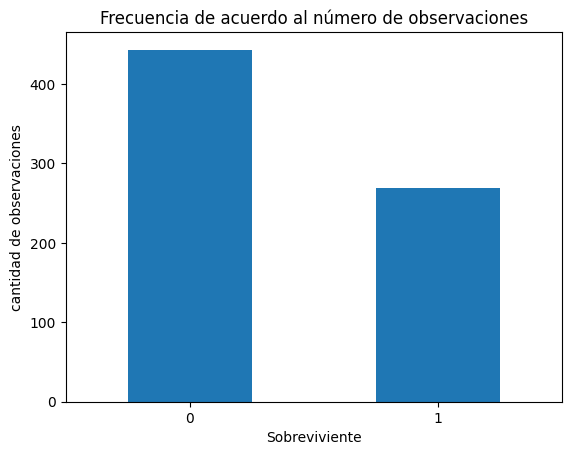

In [ ]:
def crearBarras (etiquetas, y):
  count_classes = pd.value_counts(y, sort = True)
  count_classes.plot(kind = 'bar', rot=0)
  plt.xticks(range(2), etiquetas)
  plt.title("Frecuencia de acuerdo al número de observaciones")
  plt.xlabel("Sobreviviente")
  plt.ylabel("cantidad de observaciones");

etiquetas= ['0','1']
crearBarras ( etiquetas, X_completo_training['sobreviviente'])
X_completo_training.sobreviviente.value_counts()

In [ ]:
X_completo_training

,clase,sexo,edad,sibSp,parch,tarifa,embarcado,sobreviviente,Cabin_letter
301,3,male,28.88,2,0,23.25,Q,1,C
309,1,female,30.00,0,0,56.93,C,1,E
516,2,female,34.00,0,0,10.50,S,1,F
570,2,male,62.00,0,0,10.50,S,1,C
730,1,female,29.00,0,0,211.34,S,1,B
...,...,...,...,...,...,...,...,...,...
715,3,male,19.00,0,0,7.65,S,0,F
767,3,female,30.50,0,0,7.75,Q,0,C
72,2,male,21.00,0,0,73.50,S,0,C
235,3,female,31.03,0,0,7.55,S,0,C


In [ ]:
for i in var_cat:
    print(i)
    print ("categorias para "+i+ "     "+ str (X_completo_training[i].unique()))

clase
categorias para clase     [3 1 2]
sexo
categorias para sexo     ['male' 'female']
Cabin_letter
categorias para Cabin_letter     ['C' 'E' 'F' 'B' 'D' 'G' 'A' 'T']
embarcado
categorias para embarcado     ['Q' 'C' 'S']


In [ ]:
for i in var_cat:
    print(i)
    print ("categorias para "+i+ "     "+ str (X_completo_test[i].unique()))

clase
categorias para clase     [3 1 2]
sexo
categorias para sexo     ['male' 'female']
Cabin_letter
categorias para Cabin_letter     ['C' 'E' 'F' 'B' 'D' 'G' 'A' 'T']
embarcado
categorias para embarcado     ['Q' 'C' 'S']


In [ ]:
X_completo_training

,clase,sexo,edad,sibSp,parch,tarifa,embarcado,sobreviviente,Cabin_letter
301,3,male,28.88,2,0,23.25,Q,1,C
309,1,female,30.00,0,0,56.93,C,1,E
516,2,female,34.00,0,0,10.50,S,1,F
570,2,male,62.00,0,0,10.50,S,1,C
730,1,female,29.00,0,0,211.34,S,1,B
...,...,...,...,...,...,...,...,...,...
715,3,male,19.00,0,0,7.65,S,0,F
767,3,female,30.50,0,0,7.75,Q,0,C
72,2,male,21.00,0,0,73.50,S,0,C
235,3,female,31.03,0,0,7.55,S,0,C


In [ ]:
X_completo_test

,clase,sexo,edad,sibSp,parch,tarifa,embarcado,sobreviviente,Cabin_letter
301,3,male,28.88,2,0,23.25,Q,1,C
309,1,female,30.00,0,0,56.93,C,1,E
516,2,female,34.00,0,0,10.50,S,1,F
570,2,male,62.00,0,0,10.50,S,1,C
730,1,female,29.00,0,0,211.34,S,1,B
...,...,...,...,...,...,...,...,...,...
715,3,male,19.00,0,0,7.65,S,0,F
767,3,female,30.50,0,0,7.75,Q,0,C
72,2,male,21.00,0,0,73.50,S,0,C
235,3,female,31.03,0,0,7.55,S,0,C


## **Codificación variables categoricas: ordinal y nominal**

In [ ]:
# codificacion variables ordinale, ejemplo: deficiente, regular,  bueno, excelente
# Definir el orden de las categorías
orden = ['A','B','C',  'D', 'E', 'F',  'G', 'T']

# Aplicar la codificación ordinal
X_completo_training['Cabin_letter'] = X_completo_training['Cabin_letter'].map({cat: idx for idx, cat in enumerate(orden)})
# Aplicar la codificación ordinal
X_completo_test['Cabin_letter'] = X_completo_test['Cabin_letter'].map({cat: idx for idx, cat in enumerate(orden)})

# Imprimir el dataframe codificado
# variables dummies
data  = pd.get_dummies(X_completo_training, columns=['sexo'])
data2 = pd.get_dummies(X_completo_test, columns=['sexo'])

# codificacion variables categoricas.
X_completo_training['embarque'] = X_completo_training['embarcado'].astype('category').cat.codes
X_completo_test['embarque'] = X_completo_test['embarcado'].astype('category').cat.codes

indicesDummies= data.columns
for  indice in indicesDummies:
     X_completo_training[indice] = data[indice]
     X_completo_test[indice] = data2[indice]


# codificacion variables nominales
val_elim =  ['sexo', "embarcado"]
X_completo_training = eliminar_columnas (X_completo_training, val_elim)
X_completo_test = eliminar_columnas (X_completo_test, val_elim)
#X_completo_training['embarcado'] = X_completo_training['embarcado'].apply(lambda x: x.cat.codes)
print(X_completo_training)


     clase   edad  sibSp  parch  tarifa  sobreviviente  Cabin_letter  \
301      3  28.88      2      0   23.25              1             2   
309      1  30.00      0      0   56.93              1             4   
516      2  34.00      0      0   10.50              1             5   
570      2  62.00      0      0   10.50              1             2   
730      1  29.00      0      0  211.34              1             1   
..     ...    ...    ...    ...     ...            ...           ...   
715      3  19.00      0      0    7.65              0             5   
767      3  30.50      0      0    7.75              0             2   
72       2  21.00      0      0   73.50              0             2   
235      3  31.03      0      0    7.55              0             2   
37       3  21.00      0      0    8.05              0             2   

     embarque  sexo_female  sexo_male  
301         1        False       True  
309         0         True      False  
516         2  

In [ ]:
X_completo_test

,clase,edad,sibSp,parch,tarifa,sobreviviente,Cabin_letter,embarque,sexo_female,sexo_male
301,3,28.88,2,0,23.25,1,2,1,False,True
309,1,30.00,0,0,56.93,1,4,0,True,False
516,2,34.00,0,0,10.50,1,5,2,True,False
570,2,62.00,0,0,10.50,1,2,2,False,True
730,1,29.00,0,0,211.34,1,1,2,True,False
...,...,...,...,...,...,...,...,...,...,...
715,3,19.00,0,0,7.65,0,5,2,False,True
767,3,30.50,0,0,7.75,0,2,1,True,False
72,2,21.00,0,0,73.50,0,2,2,False,True
235,3,31.03,0,0,7.55,0,2,2,True,False


## **LabelEncoder**

In [ ]:
from sklearn import preprocessing
label_encoding = preprocessing.LabelEncoder()
#si la clase es categorica codificar con label encoding
X_completo_training['sobreviviente'] = label_encoding.fit_transform(X_completo_training['sobreviviente'].astype(str))
X_completo_test['sobreviviente'] = label_encoding.fit_transform(X_completo_test['sobreviviente'].astype(str))


In [ ]:
X_completo_training.shape

(712, 10)

In [ ]:
X_train=   X_completo_training.drop('sobreviviente', axis=1)
y_train=   X_completo_training.sobreviviente
X_test=   X_completo_test.drop('sobreviviente', axis=1)
y_test=   X_completo_test.sobreviviente

## **Aumento de datos, RandomOverSampler**


os =  RandomOverSampler()

Antes de  resampling Counter({0: 443, 1: 269})
Despues del  resampling Counter({1: 443, 0: 443})


/tmp/ipython-input-159682446.py:2: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.



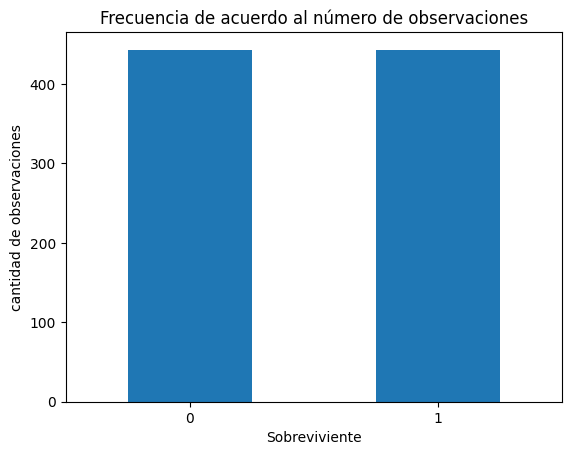

In [ ]:
from collections import Counter
os =  RandomOverSampler()

X_train_res, y_train_res = os.fit_resample(X_train, y_train)
X_test_res, y_test_res = os.fit_resample(X_test, y_test)
print ("Antes de  resampling {}".format(Counter(y_train)))
print ("Despues del  resampling {}".format(Counter(y_train_res)))
crearBarras (etiquetas, y_train_res)


In [ ]:
X_train_res

,clase,edad,sibSp,parch,tarifa,Cabin_letter,embarque,sexo_female,sexo_male
0,3,28.88,2,0,23.25,2,1,False,True
1,1,30.00,0,0,56.93,4,0,True,False
2,2,34.00,0,0,10.50,5,2,True,False
3,2,62.00,0,0,10.50,2,2,False,True
4,1,29.00,0,0,211.34,1,2,True,False
...,...,...,...,...,...,...,...,...,...
881,2,3.00,1,1,18.75,2,2,False,True
882,1,50.00,0,1,247.52,1,0,True,False
883,3,4.00,0,2,22.02,2,2,True,False
884,3,28.88,0,0,7.75,2,1,True,False


In [ ]:
X_test_res

,clase,edad,sibSp,parch,tarifa,Cabin_letter,embarque,sexo_female,sexo_male
0,3,28.88,2,0,23.25,2,1,False,True
1,1,30.00,0,0,56.93,4,0,True,False
2,2,34.00,0,0,10.50,5,2,True,False
3,2,62.00,0,0,10.50,2,2,False,True
4,1,29.00,0,0,211.34,1,2,True,False
...,...,...,...,...,...,...,...,...,...
881,1,30.00,0,0,31.00,2,0,True,False
882,2,54.00,1,3,23.00,2,2,True,False
883,1,28.88,0,0,29.70,2,0,False,True
884,1,4.00,0,2,81.86,0,2,False,True


# **Modelamiento y evaluación**

## **Decision Tree classifer**

In [ ]:
# Create Decision Tree classifer object
#verificar si usa Gini o usa entropia
clf = DecisionTreeClassifier(criterion='entropy')
# Train Decision Tree Classifer
clf = clf.fit(X_train_res,y_train_res)

In [ ]:
from sklearn.tree import export_graphviz
import pydotplus
from google.colab  import drive
drive.mount("/content/drive")
# se graba el árbol
dot_data = export_graphviz(clf, out_file=None, filled=True, feature_names = X_train_res.columns, class_names=['0','1', '2'])
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf('/content/drive/MyDrive/datasets/tree2.pdf')

Mounted at /content/drive


True

## **Calcular la importancia de cada atributo con arbol de decisión**

In [ ]:
feature_cols = X_train_res.columns
# se obtiene la importancia de cada atributo a partir del arbol
print("for para calcular la importancia de cada atributo")

# se crea un diccionario
diccionario = {}
# tree.feature_importances_ se obtiene la importancia de cada atributo
#zip  devuelve un iterador de tuplas basado en los objetos iterables
for name, importance in zip(feature_cols, clf.feature_importances_):
    diccionario[name] = importance

import operator
sortedDict = sorted(diccionario.items(), key=operator.itemgetter(1))

sortedDict

for para calcular la importancia de cada atributo


[('sexo_female', np.float64(0.0)),
 ('embarque', np.float64(0.02224750316882531)),
 ('parch', np.float64(0.02767501794862007)),
 ('Cabin_letter', np.float64(0.031134458882401864)),
 ('sibSp', np.float64(0.05236868566053539)),
 ('clase', np.float64(0.11063427521889668)),
 ('tarifa', np.float64(0.20549358138994514)),
 ('sexo_male', np.float64(0.2204516052317379)),
 ('edad', np.float64(0.3299948724990376))]

In [ ]:
X_test_res

,clase,edad,sibSp,parch,tarifa,Cabin_letter,embarque,sexo_female,sexo_male
0,3,28.88,2,0,23.25,2,1,False,True
1,1,30.00,0,0,56.93,4,0,True,False
2,2,34.00,0,0,10.50,5,2,True,False
3,2,62.00,0,0,10.50,2,2,False,True
4,1,29.00,0,0,211.34,1,2,True,False
...,...,...,...,...,...,...,...,...,...
881,1,30.00,0,0,31.00,2,0,True,False
882,2,54.00,1,3,23.00,2,2,True,False
883,1,28.88,0,0,29.70,2,0,False,True
884,1,4.00,0,2,81.86,0,2,False,True


In [ ]:
X_train_res

,clase,edad,sibSp,parch,tarifa,Cabin_letter,embarque,sexo_female,sexo_male
0,3,28.88,2,0,23.25,2,1,False,True
1,1,30.00,0,0,56.93,4,0,True,False
2,2,34.00,0,0,10.50,5,2,True,False
3,2,62.00,0,0,10.50,2,2,False,True
4,1,29.00,0,0,211.34,1,2,True,False
...,...,...,...,...,...,...,...,...,...
881,2,3.00,1,1,18.75,2,2,False,True
882,1,50.00,0,1,247.52,1,0,True,False
883,3,4.00,0,2,22.02,2,2,True,False
884,3,28.88,0,0,7.75,2,1,True,False


## **Evaluar el modelo con dataset de testeo**

In [ ]:
y_pred = clf.predict(X_test_res)


## **Matriz de confusión**

In [ ]:
# matriz de confusion
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_res, y_pred))

[[439   4]
 [  0 443]]


## **Validación cruzada**

In [ ]:
# se efectúa validación cruzada
from sklearn import model_selection
kFold = model_selection.KFold(n_splits=10)
scoring = 'accuracy'
puntaje= (model_selection.cross_val_score(clf, X_train, y_train,  scoring = scoring, cv = kFold))
print (f"( {puntaje.mean()}, {puntaje.std()}")

( 0.7825117370892019, 0.05413343529680765


## **classification_report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_res, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       443
           1       0.99      1.00      1.00       443

    accuracy                           1.00       886
   macro avg       1.00      1.00      1.00       886
weighted avg       1.00      1.00      1.00       886



## **Ajuste de hiperparámetros**

In [ ]:
from sklearn.model_selection import GridSearchCV

# puede consultar los parametros del arbol en
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

parameters = {'max_depth': [2, 4, 5, 7, 9, 10], 'criterion': ["gini", "entropy", "log_loss"]}

# cv determina la estrategia para la validacion cruzada
# None, to use the default 5-fold cross validation,
# tambien se puede especificar un entero con el # de  fold
grid_search = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [ ]:
# basado en función de José Ricardo Zapata
def obtener_performance_classification(y_true, y_pred):

    accuracy = accuracy_score(y_true, y_pred, normalize=True)
    prec = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1_score1 = f1_score(y_true, y_pred, average='macro')

    return {'accuracy': accuracy,
            'precision': prec,
            'recall':recall,
            'f1_score':f1_score1}

In [ ]:
decision_tree_model = DecisionTreeClassifier(max_depth = grid_search.best_params_['max_depth']).fit(X_train, y_train)
y_pred = decision_tree_model.predict(X_test_res)

obtener_performance_classification(y_test_res, y_pred)

{'accuracy': 0.8205417607223476,
 'precision': 0.9797297297297297,
 'recall': 0.654627539503386,
 'f1_score': 0.8154618823742086}